<a href="https://colab.research.google.com/github/kevvinnn/ExerciseAppWebsite/blob/main/PredictGameStatsBasedOnLast5orMorGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd

dataKy = pd.read_csv("/content/KyrieGameLogRegPlayoffs.csv")
dataLuk = pd.read_csv("/content/LukaGameLogRegPlayoffs.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/KyrieGameLogRegPlayoffs.csv'

In [380]:
def dataProcessor(data):
  data=data.drop(['Rk', 'G','Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp',
                   'FG', '3P', 'FT' ], axis=1)
  data['FT%'] = data['FT%'].apply(fixFT)
  data=data.dropna(axis=0)
  data = data.rename(columns={"Unnamed: 7":"W/L Margin"})
  data=data.set_index(pd.RangeIndex(len(data['MP'])))
  data['MP'] = data['MP'].apply(fixmin)
  data['MP'] = data['MP'].astype(float)
  data['MP'] = data['MP'].round()
  data['W/L Margin'] = data['W/L Margin'].apply(fixWL)
  data['W/L Margin'] = data['W/L Margin'].astype(float)
  return data


def fixFT(val):
  if pd.isnull(val) == True:
    val = 0
  return val


def fixmin(val):
  if len(val)>2:
    return val[0:2]+"."+val[4:5]
  else:
    return val

def fixWL(val):
  if len(val)==6:
    return val[4]
  elif len(val)==7:
    return val[3:6]

In [381]:
dataKy = dataProcessor(dataKy)

In [382]:
dataLuk = dataProcessor(dataLuk)

In [383]:
X = dataKy.drop(['PTS','TRB', 'AST','BLK','STL'], axis=1)
Y = dataKy[['PTS','TRB', 'AST','BLK','STL']]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2, random_state=42)

In [384]:
X_train=tf.convert_to_tensor(X_train, dtype=tf.float32)
Y_train=tf.convert_to_tensor(Y_train, dtype=tf.float32)

X_test=tf.convert_to_tensor(X_test, dtype=tf.float32)
Y_test=tf.convert_to_tensor(Y_test, dtype=tf.float32)

#X_train,Y_train

In [385]:
#X_train=tf.transpose(X_train)
#Y_train=tf.transpose(Y_train)
#X_test=tf.transpose(X_test)
#Y_test=tf.transpose(Y_test)
#Y_test.shape,Y_train.shape,X_test.shape,X_train.shape

In [389]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu")
])

model.compile(loss=tf.keras.losses.MSE,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics="mse")

history = model.fit(X_train, Y_train, epochs=250)

Epoch 1/250
2/2 [==============================] - 3s 13ms/step - loss: 142.2572 - mse: 142.2572
Epoch 2/250
2/2 [==============================] - 0s 9ms/step - loss: 107.7133 - mse: 107.7133
Epoch 3/250
2/2 [==============================] - 0s 8ms/step - loss: 72.9068 - mse: 72.9068
Epoch 4/250
2/2 [==============================] - 0s 8ms/step - loss: 38.2680 - mse: 38.2680
Epoch 5/250
2/2 [==============================] - 0s 10ms/step - loss: 22.2889 - mse: 22.2889
Epoch 6/250
2/2 [==============================] - 0s 10ms/step - loss: 31.2395 - mse: 31.2395
Epoch 7/250
2/2 [==============================] - 0s 9ms/step - loss: 31.7275 - mse: 31.7275
Epoch 8/250
2/2 [==============================] - 0s 11ms/step - loss: 19.8071 - mse: 19.8071
Epoch 9/250
2/2 [==============================] - 0s 9ms/step - loss: 14.8302 - mse: 14.8302
Epoch 10/250
2/2 [==============================] - 0s 7ms/step - loss: 16.1939 - mse: 16.1939
Epoch 11/250
2/2 [==============================] -

In [390]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 148ms/step - loss: 3.7761 - mse: 3.7761


[3.776059150695801, 3.776059150695801]

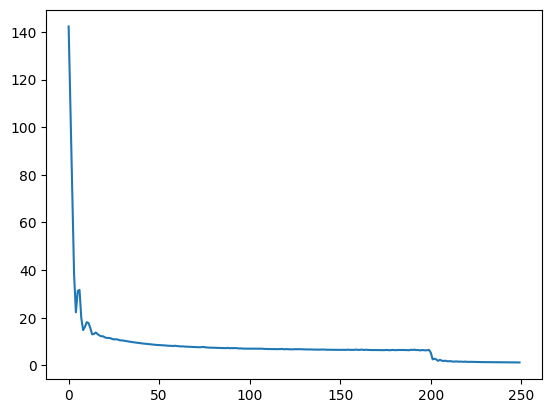

In [391]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])